Objective:

The objective of this project is to demonstrate my data analysis and machine learning skills relevant to the role of Data Analyst at Kindred Group. The project involves analyzing synthetic user data to uncover insights into user behavior on an online gambling platform, with a focus on enhancing user engagement and reducing churn. **All data used in this project is synthetic and created for demonstration purposes only**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Just in case if we are gonna use the .csv for Data Visualisation by Power BI or Tableau

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta  # Ensure datetime is imported
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Generate synthetic data
np.random.seed(42)

# Define parameters for the data
num_users = 1000
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
dates = pd.date_range(start_date, end_date).to_pydatetime().tolist()

# Function to generate random dates
def random_dates(start, end, n):
    return [start + timedelta(days=random.randint(0, (end - start).days)) for _ in range(n)]

# Generate user data
user_data = {
    'UserID': np.arange(1, num_users + 1),
    'Gender': np.random.choice(['M', 'F'], num_users),
    'Age': np.random.randint(18, 70, num_users),
    'Country': np.random.choice(['UK', 'Sweden', 'Malta', 'Germany', 'France'], num_users)
}

# Generate session data
session_data = []
for user_id in user_data['UserID']:
    num_sessions = np.random.randint(1, 100)
    for _ in range(num_sessions):
        session_data.append({
            'UserID': user_id,
            'SessionDate': random.choice(dates),
            'SessionLength': np.random.randint(1, 300),
            'BetAmount': np.random.uniform(1, 1000),
            'WinAmount': np.random.uniform(0, 1500)
        })

user_df = pd.DataFrame(user_data)
session_df = pd.DataFrame(session_data)

# Save data to Google Drive
user_df.to_csv('/content/drive/My Drive/synthetic_users.csv', index=False)
session_df.to_csv('/content/drive/My Drive/synthetic_sessions.csv', index=False)


In [ ]:
# Load data
users = pd.read_csv('/content/drive/My Drive/synthetic_users.csv')
sessions = pd.read_csv('/content/drive/My Drive/synthetic_sessions.csv')

# Convert SessionDate to datetime
sessions['SessionDate'] = pd.to_datetime(sessions['SessionDate'])

# Check data info and clean if necessary
print(users.info())
print(sessions.info())

# Handle missing values (if any)
users.dropna(inplace=True)
sessions.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   UserID   1000 non-null   int64 
 1   Gender   1000 non-null   object
 2   Age      1000 non-null   int64 
 3   Country  1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49353 entries, 0 to 49352
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserID         49353 non-null  int64         
 1   SessionDate    49353 non-null  datetime64[ns]
 2   SessionLength  49353 non-null  int64         
 3   BetAmount      49353 non-null  float64       
 4   WinAmount      49353 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.9 MB
None


In [ ]:
# Segment users by activity
active_users = sessions.groupby('UserID').agg({'SessionDate': 'count'}).reset_index()
active_users.columns = ['UserID', 'SessionCount']
active_users = active_users.merge(users, on='UserID')

# Calculate metrics
ltv = sessions.groupby('UserID').agg({'BetAmount': 'sum'}).mean()
churn_rate = active_users[active_users['SessionCount'] < 10].shape[0] / active_users.shape[0]
arpu = sessions['BetAmount'].mean()

print(f'LTV: {ltv}, Churn Rate: {churn_rate}, ARPU: {arpu}')


LTV: BetAmount    24748.039727
dtype: float64, Churn Rate: 0.087, ARPU: 501.44955174624107


In [ ]:
# Prepare data for modeling
features = active_users[['SessionCount', 'Age']]
labels = (active_users['SessionCount'] < 10).astype(int)  # Churn label

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


In [ ]:
active_users.to_csv('/content/drive/My Drive/active_users.csv', index=False)
sessions.to_csv('/content/drive/My Drive/sessions.csv', index=False)

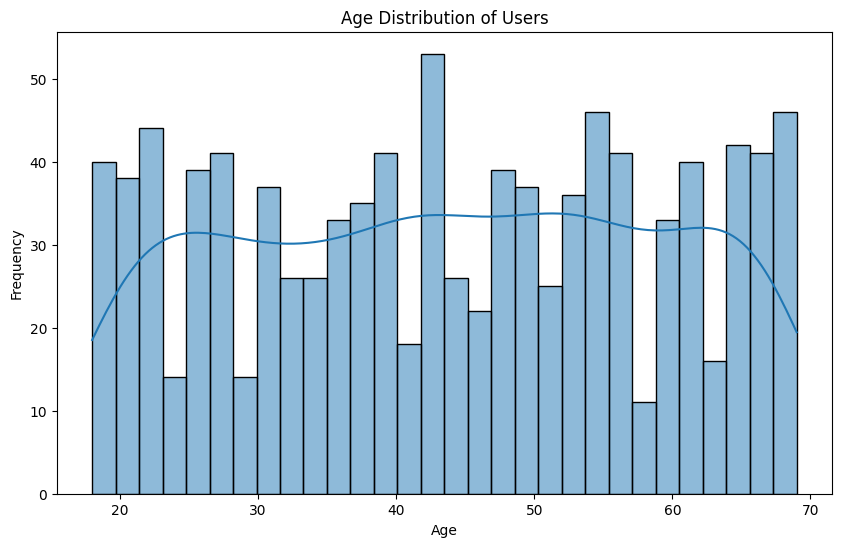

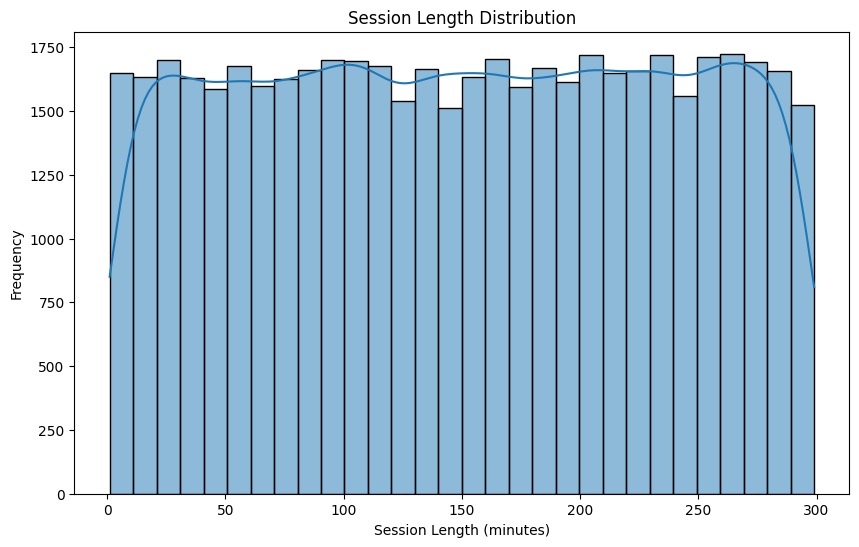

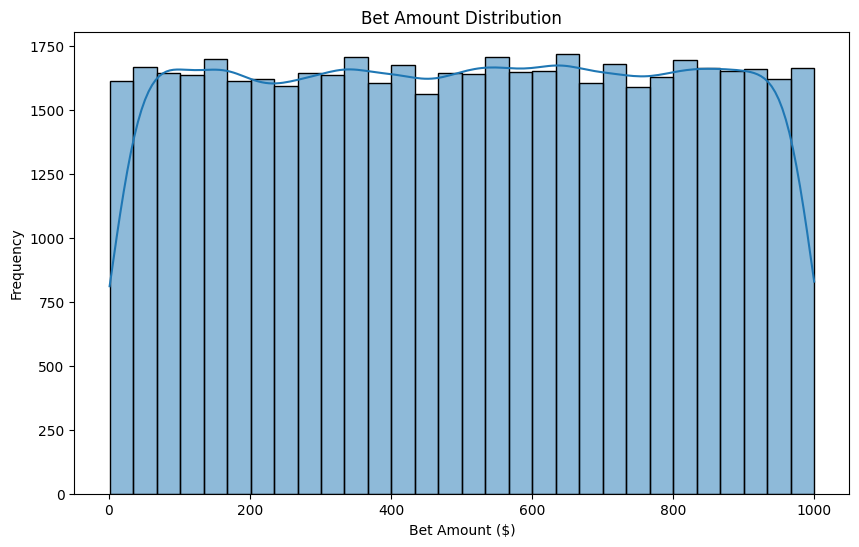

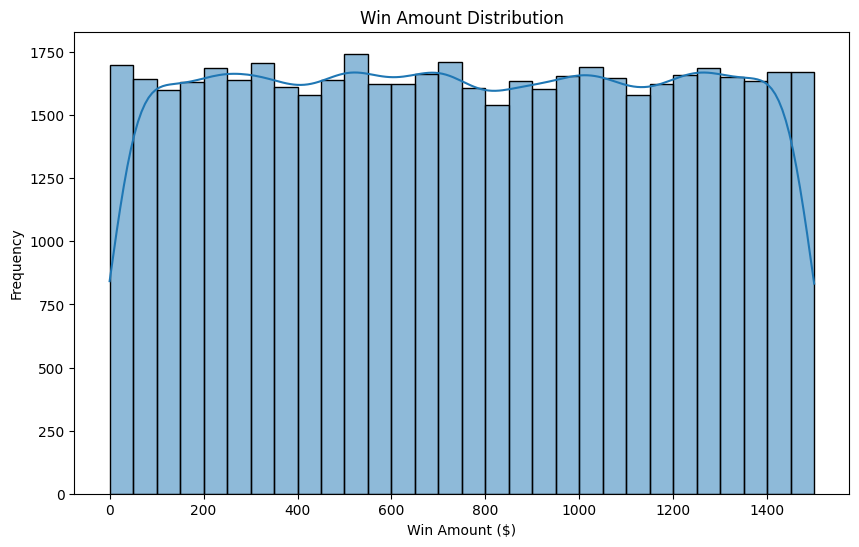

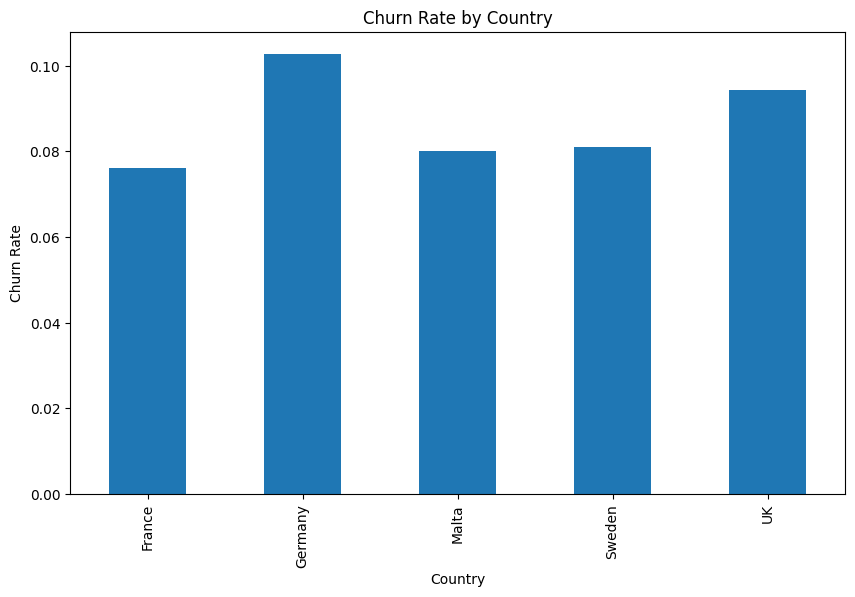

In [ ]:
# Visualize user age distribution
plt.figure(figsize=(10, 6))
sns.histplot(users['Age'], bins=30, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize session length distribution
plt.figure(figsize=(10, 6))
sns.histplot(session_df['SessionLength'], bins=30, kde=True)
plt.title('Session Length Distribution')
plt.xlabel('Session Length (minutes)')
plt.ylabel('Frequency')
plt.show()

# Visualize bet amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(session_df['BetAmount'], bins=30, kde=True)
plt.title('Bet Amount Distribution')
plt.xlabel('Bet Amount ($)')
plt.ylabel('Frequency')
plt.show()

# Visualize win amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(session_df['WinAmount'], bins=30, kde=True)
plt.title('Win Amount Distribution')
plt.xlabel('Win Amount ($)')
plt.ylabel('Frequency')
plt.show()

# Visualize churn rate by country
churn_by_country = active_users[active_users['SessionCount'] < 10].groupby('Country').size() / active_users.groupby('Country').size()
churn_by_country.plot(kind='bar', figsize=(10, 6))
plt.title('Churn Rate by Country')
plt.xlabel('Country')
plt.ylabel('Churn Rate')
plt.show()


**Explanation of the Graphs**

Each of these graphs provides insights into different aspects of the synthetic data generated for user behavior analysis on an online gambling platform. Here's a detailed explanation of each graph:

**1. Age Distribution of Users**

Description:

X-axis: Age of users.
Y-axis: Frequency of users within each age group.
Purpose: To understand the age demographics of the user base.
Interpretation: The distribution shows the frequency of users in different age groups. The data appears to be evenly distributed across different ages, which is expected in synthetic data.

**2. Session Length Distribution**

Description:

X-axis: Length of user sessions in minutes.
Y-axis: Frequency of sessions of each length.
Purpose: To analyze the typical session lengths of users.
Interpretation: The histogram shows that session lengths are uniformly distributed, indicating users spend varying amounts of time in each session.

**3. Bet Amount Distribution**

Description:

X-axis: Amount of money bet by users in dollars.
Y-axis: Frequency of bets of each amount.
Purpose: To understand the distribution of bet amounts placed by users.
Interpretation: The histogram displays a uniform distribution of bet amounts, indicating users place bets of varying amounts.

**4. Win Amount Distribution**

Description:

X-axis: Amount of money won by users in dollars.
Y-axis: Frequency of wins of each amount.
Purpose: To analyze the distribution of win amounts among users.
Interpretation: The distribution is uniform, reflecting a wide range of win amounts among users.

**5. Churn Rate by Country**

Description:

X-axis: Countries of users.
Y-axis: Churn rate (proportion of users who stop using the platform).
Purpose: To compare churn rates across different countries.
Interpretation: The bar chart shows the churn rates for different countries, indicating where user retention might need improvement. For example, Germany has the highest churn rate, while France has the lowest.

**Conclusion**

These visualizations help in understanding user behavior and identifying patterns that can inform strategic decisions. For instance:

**Age Distribution** can help tailor marketing campaigns to specific age groups.

**Session Length and Bet Amount Distributions** provide insights into user engagement and spending behavior.

**Win Amount Distribution** can indicate the effectiveness of the platform's payout structure.

**Churn Rate by Country** helps identify markets where user retention strategies need improvement.
These insights are crucial for making data-driven decisions to enhance user experience and optimize business strategies.